In [1]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


## Heat map of the max H2 produced

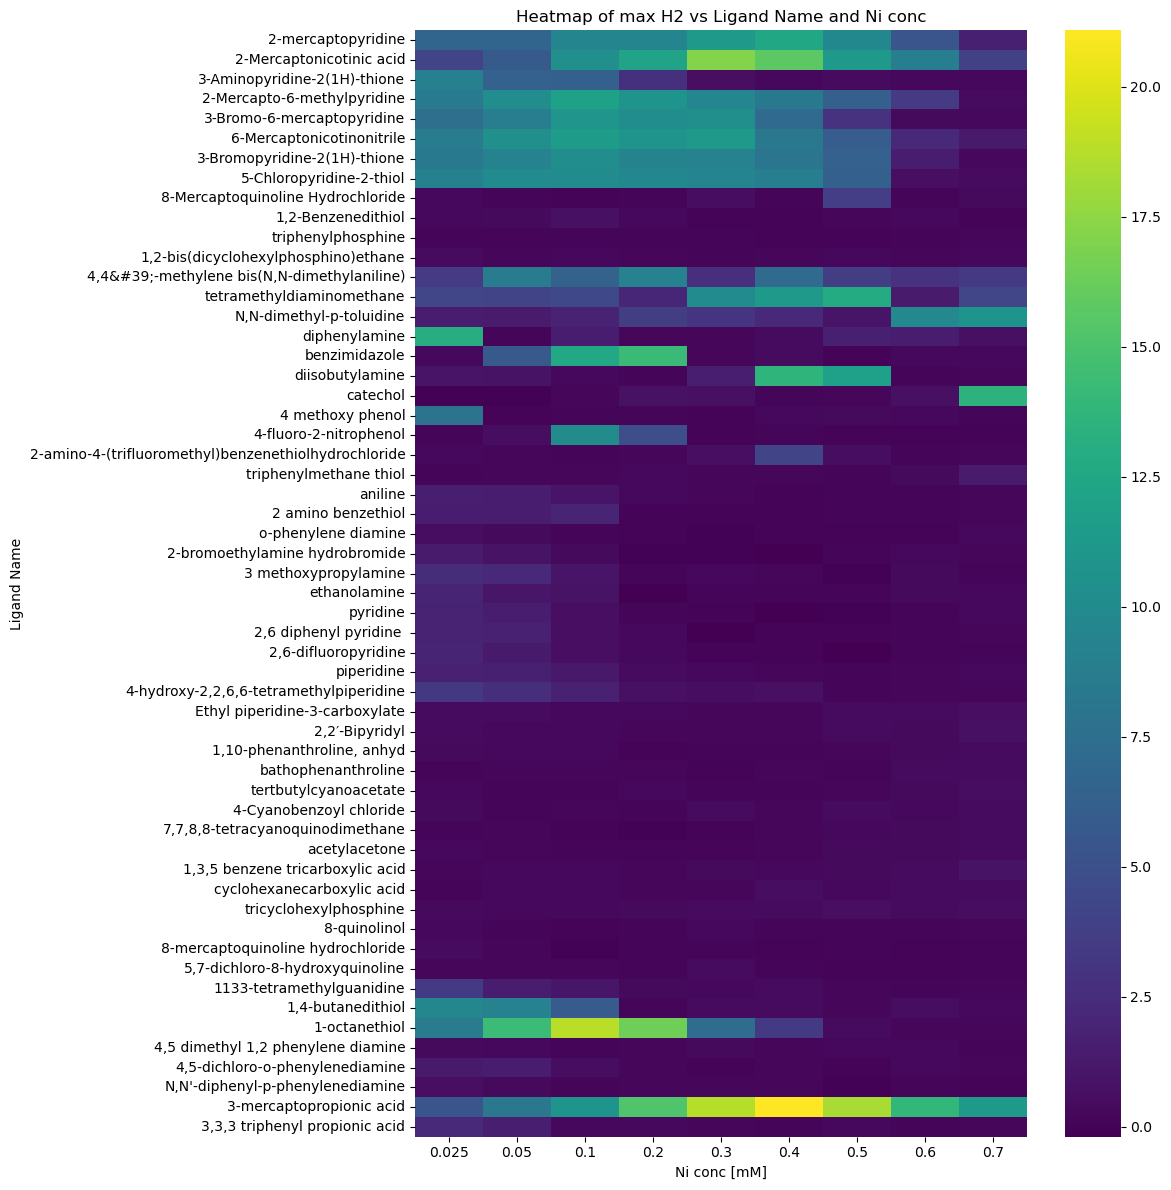

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric part for sorting
df["SampleNum"] = df["Sample ID"].str.extract(r'(\d+)').astype(int)

# Pivot table: rows = SampleNum, columns = Ni conc, values = max h2
heatmap_data = df.pivot_table(
    index=["SampleNum", "Ligand Name"],  # use ligand name here for display
    columns="Ni conc [mM]",
    values="max h2 (umol)",
    aggfunc="mean"
).sort_index(level="SampleNum")  # sorts by numeric order

# For the heatmap, use ligand names as the y-axis
heatmap_data_ligand = heatmap_data.copy()
heatmap_data_ligand.index = heatmap_data_ligand.index.get_level_values(1)  # Ligand Name

plt.figure(figsize=(12, 12))
ax = sns.heatmap(heatmap_data_ligand, cmap="viridis", annot=False)

plt.title("Heatmap of max H2 vs Ligand Name and Ni conc")
plt.ylabel("Ligand Name")
plt.xlabel("Ni conc [mM]")
plt.tight_layout()
plt.show()

### Visualize the mean value of the max H2 produced across all the Ni concentrations for each Ligand

#### It is good that this mean value is showing variablility across the different ligands. This means that we can use it as a target for our model.

In [19]:
df_ni01.groupby("Ligand Name")["max h2 (umol)"].first().sort_values(ascending=False)

Ligand Name
1-octanethiol                                           18.832912
benzimidazole                                           12.554330
2-Mercapto-6-methylpyridine                             11.916718
6-Mercaptonicotinonitrile                               11.499528
3-Bromo-6-mercaptopyridine                              10.921355
3-mercaptopropionic acid                                10.778971
2-Mercaptonicotinic acid                                10.366413
3-Bromopyridine-2(1H)-thione                            10.186278
4-fluoro-2-nitrophenol                                  10.047959
5-Chloropyridine-2-thiol                                 9.954984
2-mercaptopyridine                                       9.522341
4,4&#39;-methylene bis(N,N-dimethylaniline)              6.500432
3-Aminopyridine-2(1H)-thione                             6.285898
1,4-butanedithiol                                        5.800484
tetramethyldiaminomethane                                4.38676

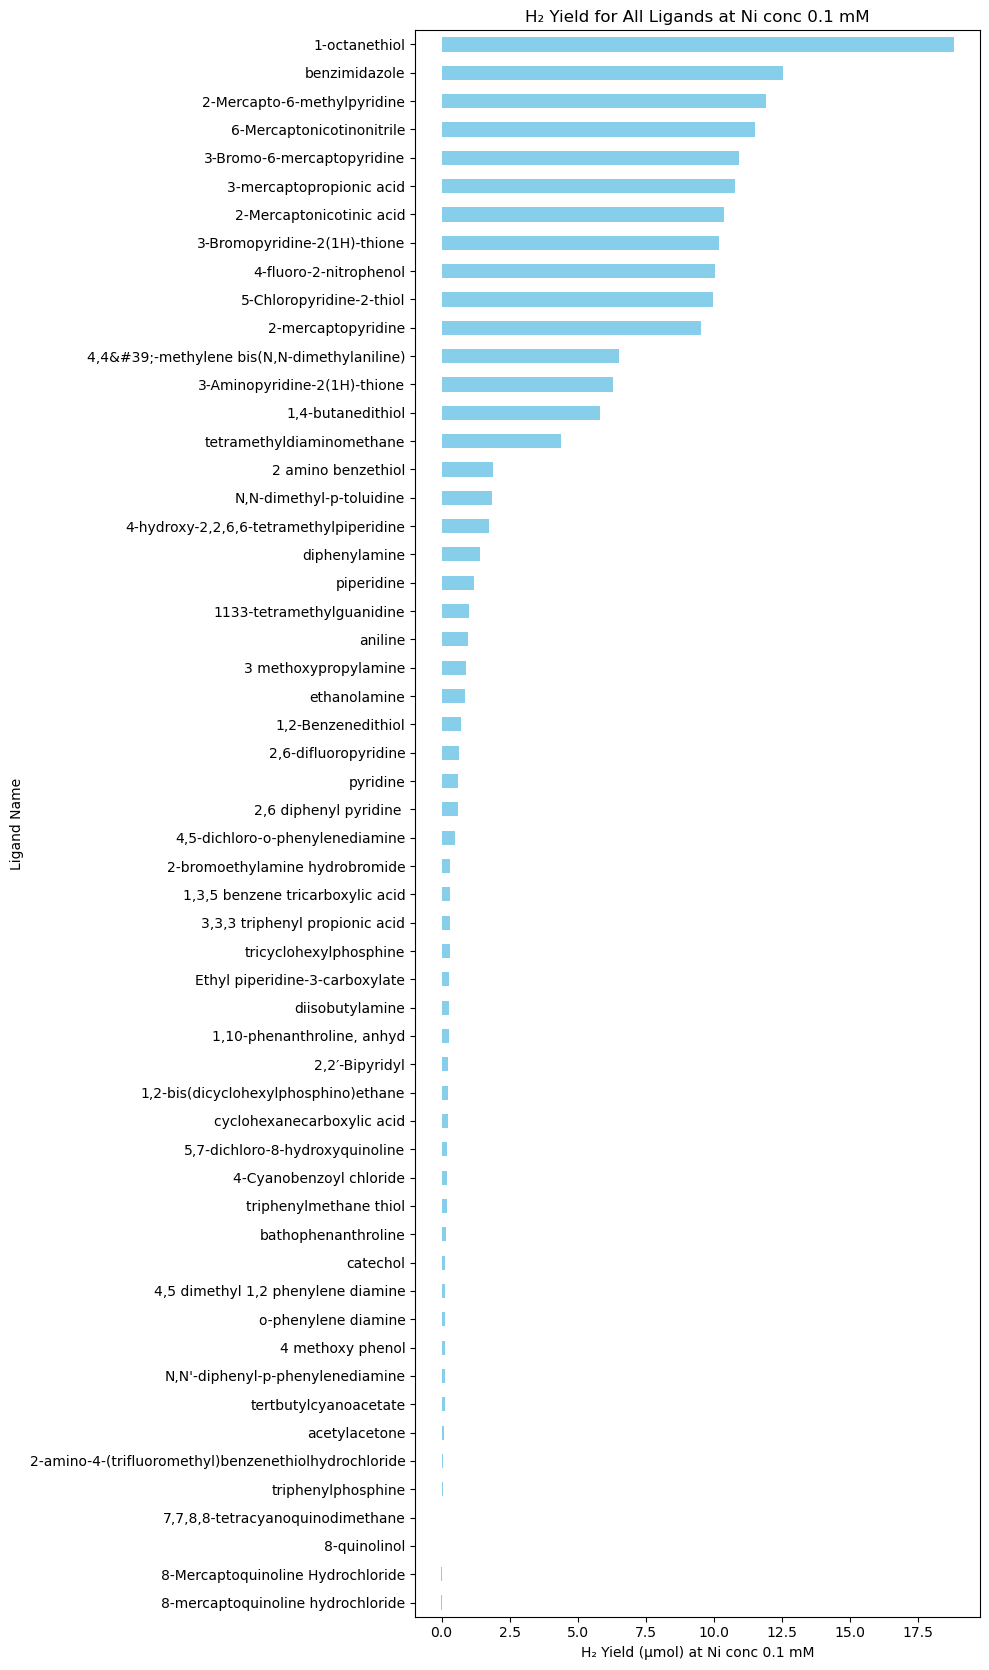

In [3]:
import matplotlib.pyplot as plt

# Filter for Ni conc = 0.1 mM
# FIX: Added 'by="max h2 (umol)"' to tell sort_values which column to use.
df_ni01 = df[df["Ni conc [mM]"] == 0.1].sort_values(by="max h2 (umol)", ascending=False)

# Group by Ligand Name and take the first (and only) value for 'max h2 (umol)'
ligand_h2 = df_ni01.groupby("Ligand Name")["max h2 (umol)"].first().sort_values(ascending=False)

# Horizontal bar plot
plt.figure(figsize=(10, len(ligand_h2) * 0.3))
ligand_h2.plot(kind="barh", color="skyblue")
plt.xlabel("H₂ Yield (µmol) at Ni conc 0.1 mM")
plt.ylabel("Ligand Name")
plt.title("H₂ Yield for All Ligands at Ni conc 0.1 mM")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Classification of high vs low

[16:12:31] WARNING: not removing hydrogen atom without neighbors
[16:12:31] WARNING: not removing hydrogen atom without neighbors
[16:12:31] WARNING: not removing hydrogen atom without neighbors
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please use MorganGenerator
[16:12:31] DEPRECATION WARNING: please

              precision    recall  f1-score   support

         Low       0.80      1.00      0.89         8
        High       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12



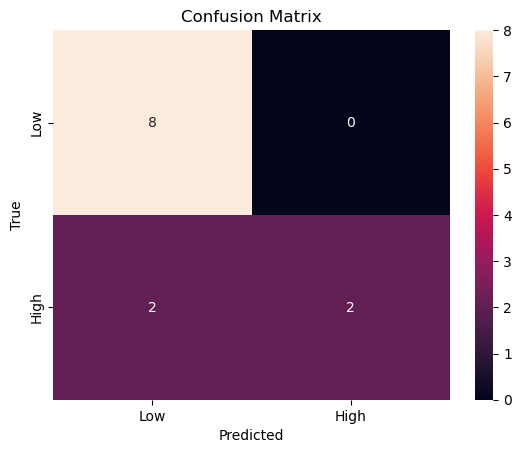

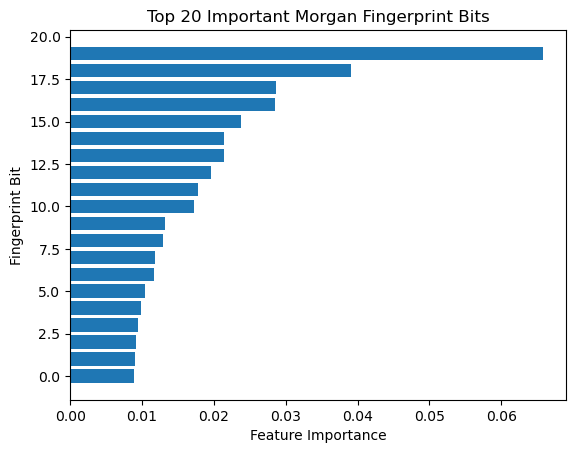

In [14]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 0: Load ligand names and H2 values ---
ligands = df_ni01["Ligand Name"].values
h2 = df_ni01["max h2 (umol)"].values

# Handle NaN or negative values
h2 = np.nan_to_num(h2, nan=0.0)
h2[h2 < 0] = 0.0

# --- Step 1: Convert H2 to binary classes ---
# 0 = Low (<=1), 1 = High (>1)
y = (h2 > 1).astype(int)

# --- Step 2: Convert SMILES to Morgan fingerprints ---
# Assuming df_ni01['SMILES'] exists
mols = [Chem.MolFromSmiles(s) for s in df_ni01['SMILES']]
valid_idx = [i for i, m in enumerate(mols) if m is not None]

# Filter valid molecules and labels
mols = [mols[i] for i in valid_idx]
y = y[valid_idx]

# Compute fingerprints
X = np.array([np.array(AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024)) for m in mols])

# --- Step 3: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 4: Train a Random Forest classifier ---
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# --- Step 5: Evaluate on test set ---
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Low", "High"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Optional: Feature importance ---
importances = clf.feature_importances_
top_indices = np.argsort(importances)[-20:]  # top 20 features
plt.barh(range(len(top_indices)), importances[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Fingerprint Bit")
plt.title("Top 20 Important Morgan Fingerprint Bits")
plt.show()


## Training Set performance

Training set classification report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        27
        High       1.00      1.00      1.00        17

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



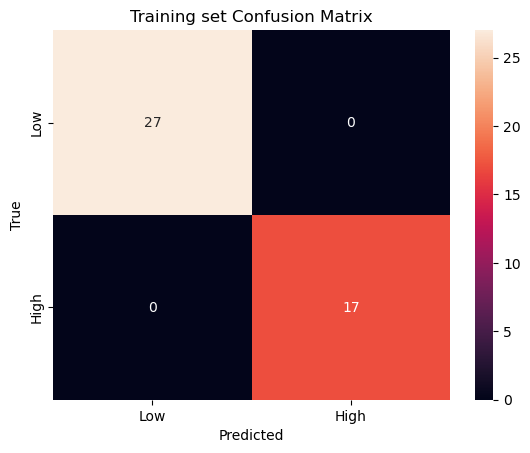

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Predict on training set ---
y_train_pred = clf.predict(X_train)

# --- Classification report ---
print("Training set classification report:")
print(classification_report(y_train, y_train_pred, target_names=["Low", "High"]))

# --- Confusion matrix ---
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Training set Confusion Matrix")
plt.show()


[16:48:45] WARNING: not removing hydrogen atom without neighbors
[16:48:45] WARNING: not removing hydrogen atom without neighbors
[16:48:45] WARNING: not removing hydrogen atom without neighbors
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please use MorganGenerator
[16:48:45] DEPRECATION WARNING: please

Test set classification report:
              precision    recall  f1-score   support

         Low       0.88      0.88      0.88         8
        High       0.75      0.75      0.75         4

    accuracy                           0.83        12
   macro avg       0.81      0.81      0.81        12
weighted avg       0.83      0.83      0.83        12



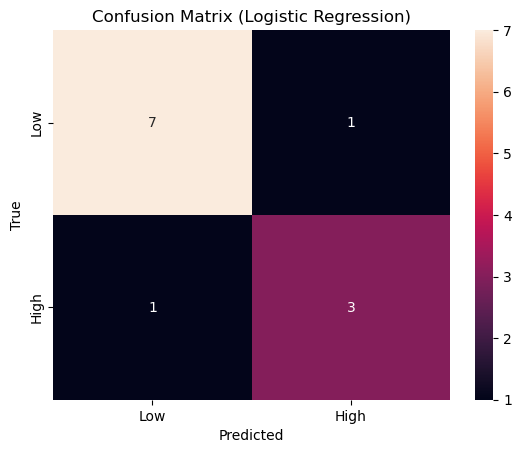

Training set classification report:
              precision    recall  f1-score   support

         Low       0.86      0.89      0.87        27
        High       0.81      0.76      0.79        17

    accuracy                           0.84        44
   macro avg       0.83      0.83      0.83        44
weighted avg       0.84      0.84      0.84        44



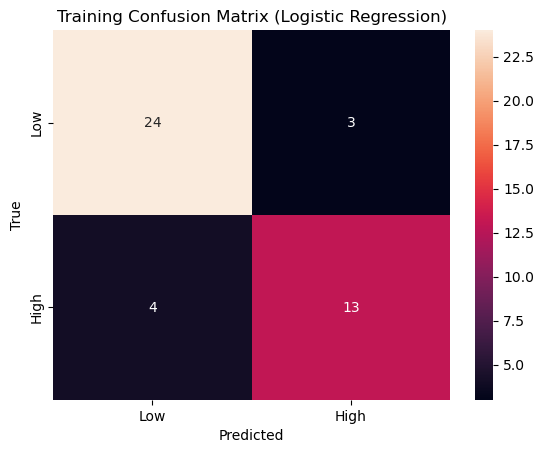

Explained variance ratio by top 10 PCA components: [0.12240507 0.07898959 0.05685111 0.05266488 0.04688676 0.04201189
 0.03578815 0.03209321 0.0308354  0.02902443]


In [37]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 0: Load ligand names and H2 values ---
ligands = df_ni01["Ligand Name"].values
h2 = df_ni01["max h2 (umol)"].values

# Handle NaN or negative values
h2 = np.nan_to_num(h2, nan=0.0)
h2[h2 < 0] = 0.0

# --- Step 1: Convert H2 to binary classes ---
# 0 = Low (<=1), 1 = High (>1)
y = (h2 > 1).astype(int)

# --- Step 2: Convert SMILES to Morgan fingerprints ---
mols = [Chem.MolFromSmiles(s) for s in df_ni01['SMILES']]
valid_idx = [i for i, m in enumerate(mols) if m is not None]

# Keep only valid molecules and corresponding labels
mols = [mols[i] for i in valid_idx]
y = y[valid_idx]

# Compute Morgan fingerprints
X = np.array([np.array(AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024)) for m in mols])

# --- Step 2b: Dimensionality reduction to 10 PCA features ---
pca = PCA(n_components=10, random_state=42)
X_reduced = pca.fit_transform(X)

# --- Step 3: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 4: Train Logistic Regression classifier ---
clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
clf.fit(X_train, y_train)

# --- Step 5: Evaluate on test set ---
y_pred = clf.predict(X_test)
print("Test set classification report:")
print(classification_report(y_test, y_pred, target_names=["Low", "High"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Low","High"], yticklabels=["Low","High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# --- Step 6: Evaluate on training set ---
y_train_pred = clf.predict(X_train)
print("Training set classification report:")
print(classification_report(y_train, y_train_pred, target_names=["Low", "High"]))

cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=["Low","High"], yticklabels=["Low","High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Training Confusion Matrix (Logistic Regression)")
plt.show()

# --- Optional: PCA explained variance ---
print("Explained variance ratio by top 10 PCA components:", pca.explained_variance_ratio_)
